This codes are from
https://www.kaggle.com/raghaw/mnist-cnn-external-data-perfect-score

In [2]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.utils import np_utils

%matplotlib inline

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.vstack((X_train, X_test))
y_train = np.concatenate([y_train, y_test])
X_train = X_train.reshape(-1, 28, 28, 1)
print(X_train.shape, y_train.shape)

(70000, 28, 28, 1) (70000,)


In [4]:
train = pd.read_csv('train.csv').values
y_val = train[:,0].astype('int32')
X_val = train[:,1:].astype('float32')
X_val = X_val.reshape(-1,28,28,1)
print(X_val.shape, y_val.shape)

(42000, 28, 28, 1) (42000,)


In [5]:
X_test = pd.read_csv('test.csv').values.astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1)

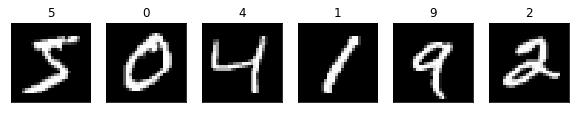

In [6]:
fig = plt.figure(figsize=(10,10))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i].reshape(28,28), cmap='gray')
    ax.set_title(str(y_train[i]))

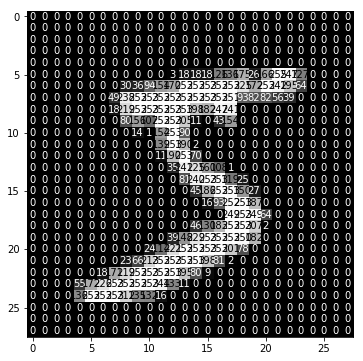

In [7]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (6,6)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0].reshape(28,28), ax)

In [8]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [9]:
print('Integer-valued labels:')
print(y_train[:10])

y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)

print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

W0819 19:59:57.966006 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 19:59:57.968008 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 19:59:57.970010 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 19:59:58.002046 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 192)         0         
__________

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0819 20:00:06.569247 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0819 20:00:06.587262 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
from keras.callbacks import ModelCheckpoint   
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)
hist = model.fit(X_train, y_train, batch_size=100, epochs=25,
          validation_data=(X_val, y_val), callbacks=[reduce_lr],
          verbose=1, shuffle=True)

W0819 20:00:19.884542 47736 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0819 20:00:19.953522 47736 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 70000 samples, validate on 42000 samples
Epoch 1/25
70000/70000 [==============================] - 21s 299us/step - loss: 0.1106 - acc: 0.9653 - val_loss: 0.0371 - val_acc: 0.9886
Epoch 2/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0333 - acc: 0.9900 - val_loss: 0.0234 - val_acc: 0.9929
Epoch 3/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0243 - val_acc: 0.9927
Epoch 4/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0185 - acc: 0.9943 - val_loss: 0.0119 - val_acc: 0.9963
Epoch 5/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0160 - acc: 0.9951 - val_loss: 0.0098 - val_acc: 0.9970
Epoch 6/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0097 - val_acc: 0.9969
Epoch 7/25
70000/70000 [==============================] - 18s 262us/step - loss: 0.0110 - acc: 0.9967 - val_loss: 0.

In [13]:
testY = model.predict_classes(X_test, verbose=2)

In [14]:
sub = pd.read_csv('sample_submission.csv')
sub['Label'] = testY
sub.to_csv('submission.csv',index=False)